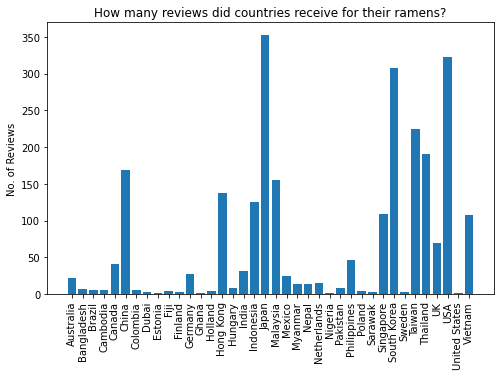

In [62]:
#Q1
import pandas as pd
from matplotlib import pyplot as plt
ramen = pd.read_csv("ramen-ratings.csv")
ramen = ramen.sort_values("Stars", ascending = False)
ramen = ramen.iloc[3:, :]
ramen1 = ramen.groupby('Country').count()
ramen1.head()
plt.figure(figsize = (8,5))
plt.bar(ramen1.index, ramen1['Review #'])
plt.xticks(rotation = 90)
plt.title("How many reviews did countries receive for their ramens?")
plt.ylabel("No. of Reviews")
plt.show()


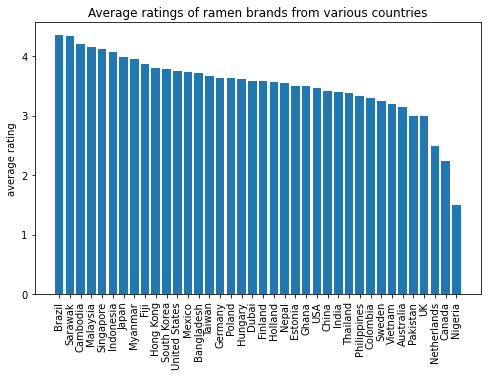

In [64]:
#Q2
ramen['Stars']= ramen['Stars'].astype(float)
ramen2 = ramen.groupby('Country')['Stars'].mean()
ramen2 = ramen2.reset_index(name = "avg_rating")
ramen2 = ramen2.sort_values('avg_rating', ascending = False)
plt.figure(figsize = (8,5))
plt.bar(ramen2.Country, ramen2.avg_rating)
plt.xticks(rotation = 90)
plt.ylabel("average rating")
plt.title("Average ratings of ramen brands from various countries")
plt.show()

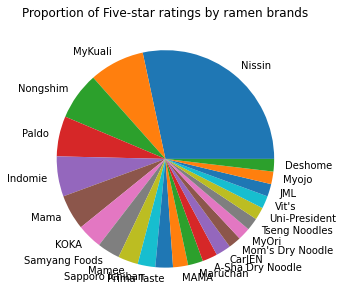

In [65]:
#Q3
ramen5 = ramen[ramen['Stars']==5.00]
ramen5 = ramen5.groupby('Brand')["Review #"].count().reset_index(name = "fivestar_n")
ramen5 = ramen5.sort_values("fivestar_n", ascending = False)
ramen5 = ramen5[ramen5['fivestar_n'] >=5]
ramen5
plt.figure(figsize = (8,5))
plt.pie(ramen5.fivestar_n, labels = ramen5.Brand)
plt.title("Proportion of Five-star ratings by ramen brands")
plt.show()

(6234, 12)


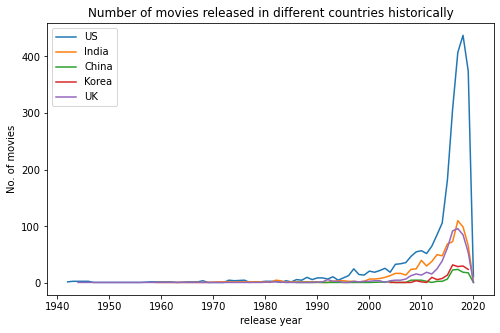

In [66]:
#Q4
netflix = pd.read_csv("netflix-titles.csv")
netflix.head()
print(netflix.shape) # 6234 rows
nf = netflix.dropna(subset = ['country'])
nf.shape  #5758 rows

nf_us = nf[nf["country"].str.contains("United States", case = False, regex = False)]
us_release = nf_us.groupby('release_year')['show_id'].count().reset_index(name = "movie_count")
nf_india = nf[nf["country"].str.contains("India", case = False, regex = False)]
india_release = nf_india.groupby('release_year')['show_id'].count().reset_index(name = "movie_count")
nf_china = nf[nf["country"].str.contains("China", case = False, regex = False)]
china_release = nf_china.groupby('release_year')['show_id'].count().reset_index(name = "movie_count")
nf_korea = nf[nf["country"].str.contains("Korea", case = False, regex = False)]
korea_release = nf_korea.groupby('release_year')['show_id'].count().reset_index(name = "movie_count")
nf_uk = nf[nf["country"].str.contains("United Kingdom", case = False, regex = False)]
uk_release = nf_uk.groupby('release_year')['show_id'].count().reset_index(name = "movie_count")
#I am sure there is more efficient way to do this. Will explore later.
#now plots
plt.figure(figsize = (8,5))
plt.plot(us_release.release_year, us_release.movie_count)
plt.plot(india_release.release_year, india_release.movie_count)
plt.plot(china_release.release_year, china_release.movie_count)
plt.plot(korea_release.release_year, korea_release.movie_count)
plt.plot(uk_release.release_year, uk_release.movie_count)
plt.title("Number of movies released in different countries historically")
plt.legend(["US", "India", "China", "Korea", "UK"])
plt.xlabel("release year")
plt.ylabel("No. of movies")
plt.show()
#Number of movies that release exploded after the 1990s
#COVID in 2020 brought that trend to a halt.